In [1]:
%load_ext autoreload
%autoreload 2
from lab.postprocessing.toolbox import load_model, load_and_evaluate_dir, evaluate
from lab.postprocessing.visualization import *
from lab.data.datasets import SyntheticDatasetHard
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import torch
import os
import numpy as np

In [4]:
result_dir = '/home/iai/user/conrads/rnn-cnn/results'

In [8]:
model, loader = load_model(result_dir, 'yelp/mlp/_model_layer_dims_(5,)/0710-115015')
model.print_layers()

tokenizing data...


650000it [00:52, 12425.35it/s]


tokenizing data...


50000it [00:04, 11796.69it/s]


model layers:
Sequential(
  (0): Linear(in_features=5, out_features=5, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=5, out_features=6, bias=True)
)


In [10]:
model, loader = load_model(result_dir, 'yelp/rnn/_model_head_dims_()_model_threshold_0.8/0710-115121')
model.print_layers()

tokenizing data...


650000it [00:52, 12464.00it/s]


tokenizing data...


50000it [00:04, 11974.12it/s]


model layers:
Sequential(
  (0): Linear(in_features=5, out_features=5, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Dropout(p=0.2, inplace=False)
)
Sequential(
  (0): Linear(in_features=5, out_features=6, bias=True)
)


In [5]:
model_dir = 'yelp/mlp/_model_layer_dims_(5,)'
acc_mlp3 = load_and_evaluate_dir(result_dir, model_dir)

tokenizing data...


650000it [00:52, 12425.14it/s]
/home/iai/user/conrads/rnn-cnn/src/lab/data/textclassification_datasets.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(input, dtype=torch.int64)


tokenizing data...


50000it [00:06, 7505.60it/s] 


TypeError: __init__() missing 1 required positional argument: 'vocab_size'

In [ ]:
model_dir = 'yelp/rnn/_model_head_dims_()_model_threshold_0.8'
acc_mlp4 = load_and_evaluate_dir(result_dir, model_dir)

In [32]:
model_dir = 'covtype/rnn/_model_max_rec_2'
acc_rnn = load_and_evaluate_dir(result_dir, model_dir)

accuracy:  78.99 +-  0.09
cross entropy:  0.494 +-  0.001
average steps:  1.903 +-  0.022
number parameters: 1288


In [33]:
model_dir = 'covtype/myrnn/_model_threshold_0.9_model_max_rec_2_model_rnn_type_myrnn/'
acc_myrnn = load_and_evaluate_dir(result_dir, model_dir)

accuracy:  80.27 +-  0.15
cross entropy:  0.474 +-  0.008
average steps:  1.778 +-  0.038
number parameters: 1568


In [34]:
model_dir = 'covtype/myrnn/_model_threshold_0.9_model_max_rec_2_model_rnn_type_elman/'
acc_elman = load_and_evaluate_dir(result_dir, model_dir)

accuracy:  78.70 +-  0.98
cross entropy:  0.505 +-  0.018
average steps:  1.753 +-  0.056
number parameters: 1312


In [35]:
model_dir = 'covtype/myrnn/_model_threshold_0.9_model_max_rec_3_model_rnn_type_simple_elman/'
acc_selman = load_and_evaluate_dir(result_dir, model_dir)

accuracy:  81.03 +-  0.00
cross entropy:  0.466 +-  0.000
average steps:  2.597 +-  0.000
number parameters: 1544


tensor(4.0354, device='cuda:0')


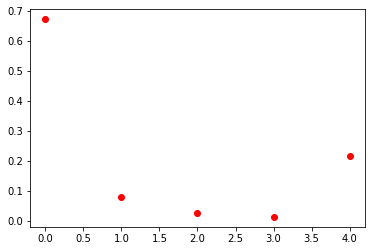

In [9]:
model_name = 'covtype/myrnn/_model_threshold_0.7_model_max_rec_5_model_rnn_type_simple_elman/0614-203542'
model, loader = load_model(result_dir, model_name)
hgram = make_histogram_plot(model, loader)

avg_rec = 0
for i, frac in enumerate(hgram):
    avg_rec += (i + 1) * 2 * frac
print(avg_rec)

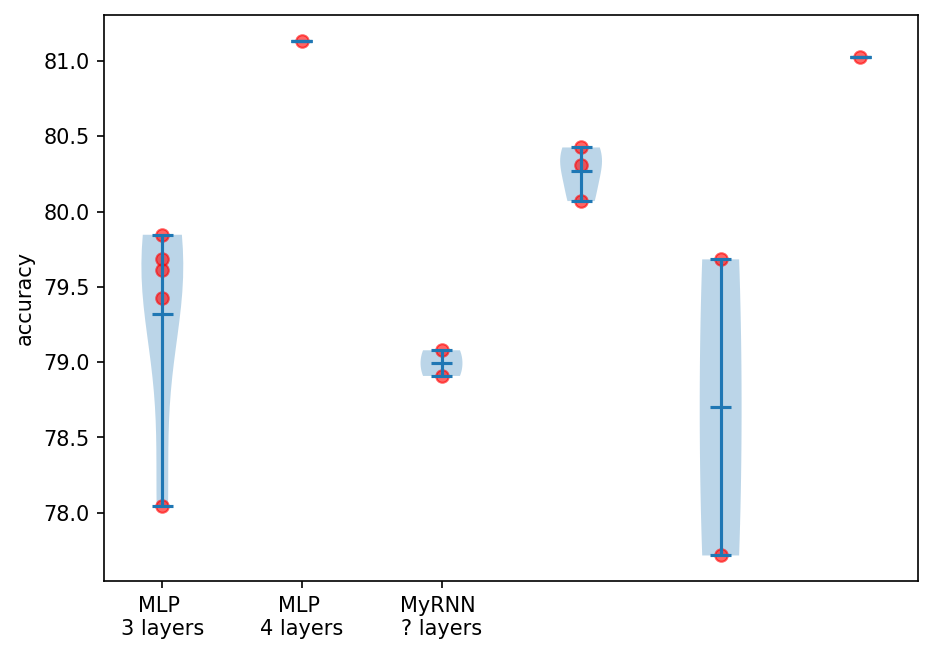

In [37]:
plt.figure(figsize=(7, 5), dpi=150)

make_violin_plot([acc_mlp3, acc_mlp4, acc_rnn, acc_myrnn, acc_elman, acc_selman])


plt.xticks(range(3), ['MLP \n3 layers', 'MLP \n4 layers', 'MyRNN \n? layers'])
plt.ylabel('accuracy')
plt.savefig(os.path.join(result_dir, 'images/spiral_violin'))

In [ ]:
import scipy
scipy.stats.ttest_ind(acc_mlp3, acc_rnn1, equal_var=False)